In [1]:
import h5py
import os
import numpy as np
import SimpleITK as sitk
from tqdm import tqdm

os.chdir('/mnt/sda3/yigedabuliu/lkq/brats-unet/')
os.getcwd()

'/mnt/sda3/yigedabuliu/lkq/brats-unet'

In [77]:
from torch.utils.data import Dataset
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from BraTS import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [78]:
# T1DUAL包含两种类型的图像，T2SPIR包含一种类型的图像
modalities = ['MR_T1DUAL', 'MR_T2SPIR']

# 来自definitions.txt
MR_Train_sets = [1, 2, 3, 5, 8, 10, 13, 15, 19, 20, 21, 22, 31, 32, 33, 34, 36, 37, 38, 39]
MR_Test_Sets = [4, 6, 7, 9, 11, 12, 14, 16, 17, 18, 23, 24, 25, 26, 27, 28, 29, 30, 35, 40]


In [80]:
# 处理 MR_T1DUAL_InPhase 训练集
MR_T1DUAL_PATH = '/mnt/sda3/yigedabuliu/lkq/data/MR/CHAOS/Train_Sets_nifti/MR_T1DUAL/'

out_MR_T1DUAL_InPhase_PATH = '/mnt/sda3/yigedabuliu/lkq/data/MR/CHAOS/h5_datasets/MR_T1DUAL_InPhase/Train/'

T1DUAL_Type = ['InPhase', 'OutPhase']

l = len(MR_Train_sets)

for i in tqdm(range(l)):
    img_name = str(MR_Train_sets[i]) + '_' + 'image_T1DUAL_InPhase' + '.nii.gz'
    seg_name = str(MR_Train_sets[i]) + '_' + 'segmentation_T1DUAL.nii.gz'
    # H,W,D
    label = sitk.GetArrayFromImage(sitk.ReadImage(MR_T1DUAL_PATH + seg_name)).transpose(1, 2, 0)

    # (D,H,W) -> (H,W,D)
    img = sitk.GetArrayFromImage(sitk.ReadImage(MR_T1DUAL_PATH + img_name)).transpose(1, 2, 0)

    label = label.astype(np.uint8)
    img = np.expand_dims(img.astype(np.float32), axis=0)

    # 保存文件名
    output = str(MR_Train_sets[i]) + '_' + 'h5_T1DUAL_InPhase.h5'

    f = h5py.File(out_MR_T1DUAL_InPhase_PATH + output, 'w')
    f.create_dataset('image', data=img, compression="gzip")
    f.create_dataset('label', data=label, compression="gzip")
    f.close()




100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.70it/s]


In [81]:
# 处理 MR_T1DUAL_InPhase 训练集
MR_T1DUAL_PATH = '/mnt/sda3/yigedabuliu/lkq/data/MR/CHAOS/Train_Sets_nifti/MR_T1DUAL/'

out_MR_T1DUAL_OutPhase_PATH = '/mnt/sda3/yigedabuliu/lkq/data/MR/CHAOS/h5_datasets/MR_T1DUAL_OutPhase/Train/'

l = len(MR_Train_sets)

for i in tqdm(range(l)):
    img_name = str(MR_Train_sets[i]) + '_' + 'image_T1DUAL_OutPhase' + '.nii.gz'
    seg_name = str(MR_Train_sets[i]) + '_' + 'segmentation_T1DUAL.nii.gz'
    # H,W,D
    label = sitk.GetArrayFromImage(sitk.ReadImage(MR_T1DUAL_PATH + seg_name)).transpose(1, 2, 0)

    # (D,H,W) -> (H,W,D)
    img = sitk.GetArrayFromImage(sitk.ReadImage(MR_T1DUAL_PATH + img_name)).transpose(1, 2, 0)

    label = label.astype(np.uint8)
    img = np.expand_dims(img.astype(np.float32), axis=0)

    # 保存文件名
    output = str(MR_Train_sets[i]) + '_' + 'h5_T1DUAL_OutPhase.h5'

    f = h5py.File(out_MR_T1DUAL_OutPhase_PATH + output, 'w')
    f.create_dataset('image', data=img, compression="gzip")
    f.create_dataset('label', data=label, compression="gzip")
    f.close()




100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.78it/s]


In [85]:
# 处理 MR_T2SPIR 训练集

MR_T2SPIR_PATH = '/mnt/sda3/yigedabuliu/lkq/data/MR/CHAOS/Train_Sets_nifti/MR_T2SPIR/'

out_MR_T2SPIR_PATH = '/mnt/sda3/yigedabuliu/lkq/data/MR/CHAOS/h5_datasets/MR_T2SPIR/Train/'

if not os.path.exists(out_MR_T2SPIR_PATH):
    os.makedirs(out_MR_T2SPIR_PATH)

l = len(MR_Train_sets)

for i in tqdm(range(l)):
    img_name = str(MR_Train_sets[i]) + '_' + 'image_T2SPIR' + '.nii.gz'
    seg_name = str(MR_Train_sets[i]) + '_' + 'segmentation_T2SPIR.nii.gz'
    # H,W,D
    label = sitk.GetArrayFromImage(sitk.ReadImage(MR_T2SPIR_PATH + seg_name)).transpose(1, 2, 0)

    # (D,H,W) -> (H,W,D)
    img = sitk.GetArrayFromImage(sitk.ReadImage(MR_T2SPIR_PATH + img_name)).transpose(1, 2, 0)

    label = label.astype(np.uint8)
    img = np.expand_dims(img.astype(np.float32), axis=0)

    # 保存文件名
    output = str(MR_Train_sets[i]) + '_' + 'h5_T2SPIR.h5'

    f = h5py.File(out_MR_T2SPIR_PATH + output, 'w')
    f.create_dataset('image', data=img, compression="gzip")
    f.create_dataset('label', data=label, compression="gzip")
    f.close()

100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.39it/s]


In [71]:
images = img.copy()

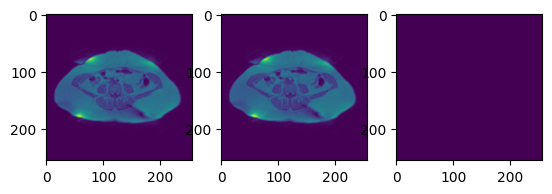

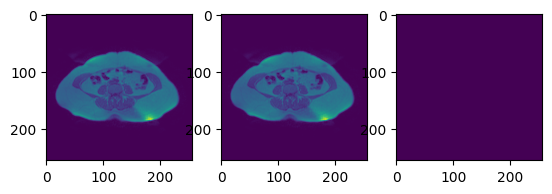

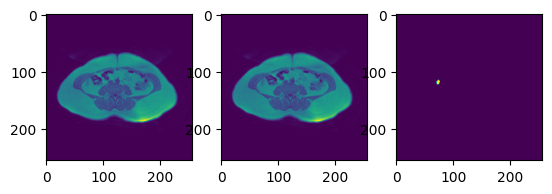

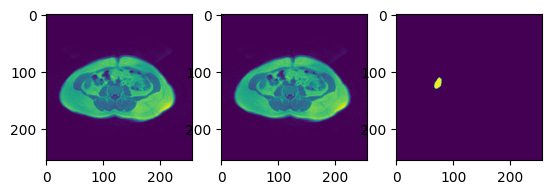

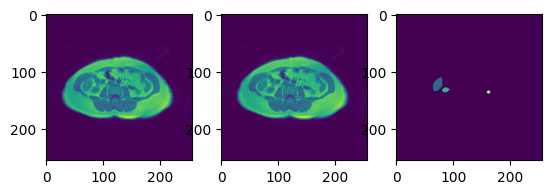

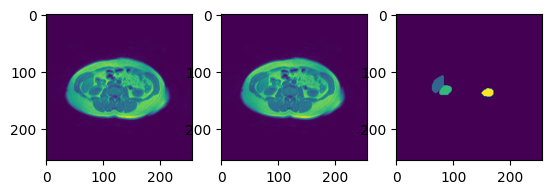

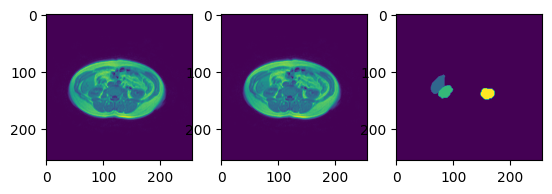

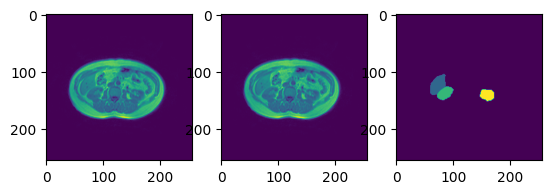

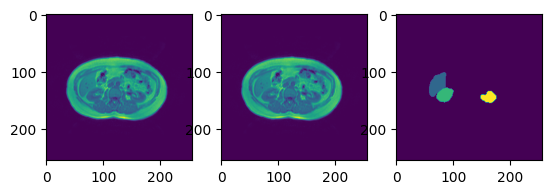

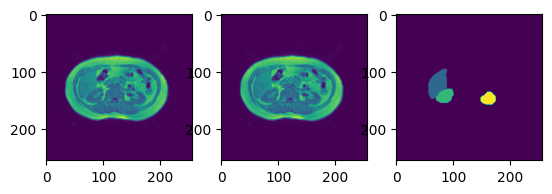

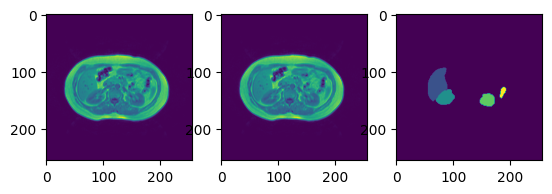

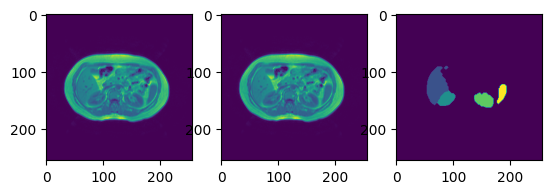

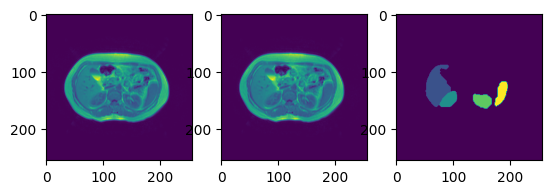

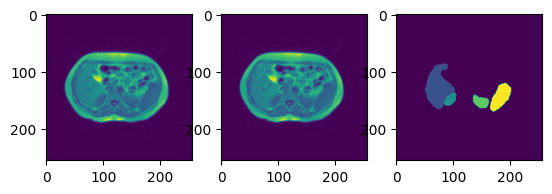

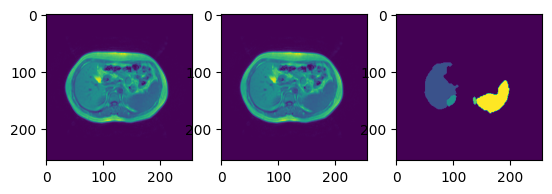

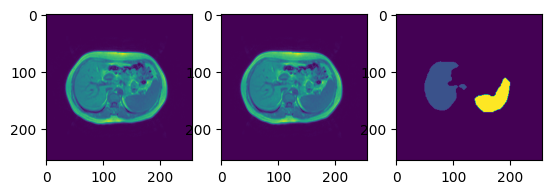

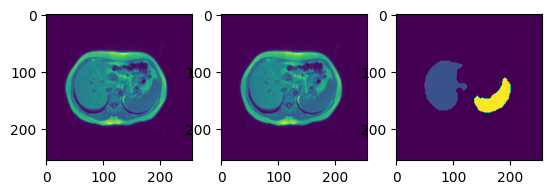

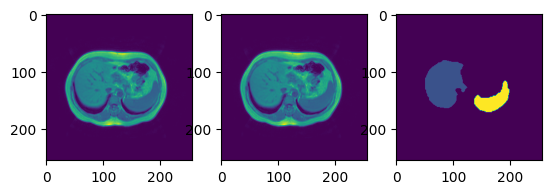

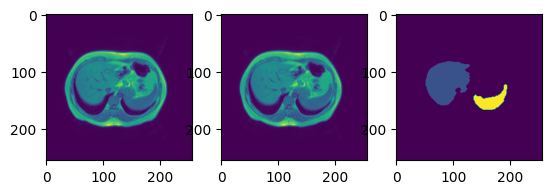

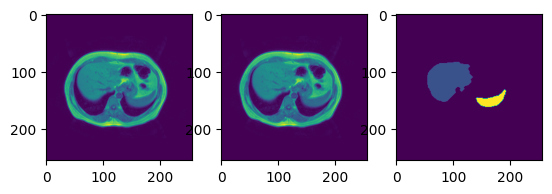

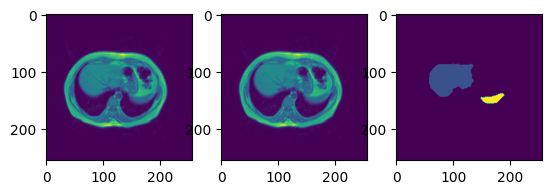

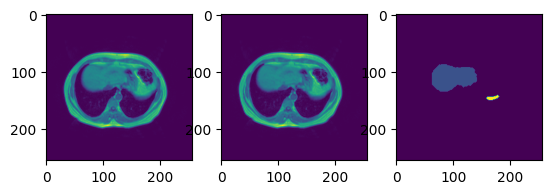

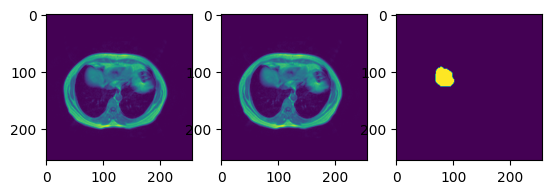

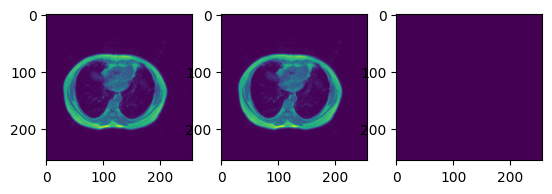

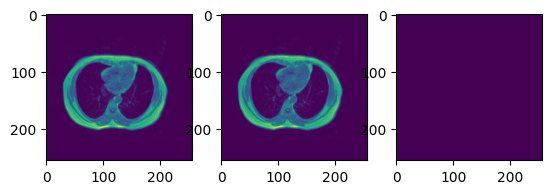

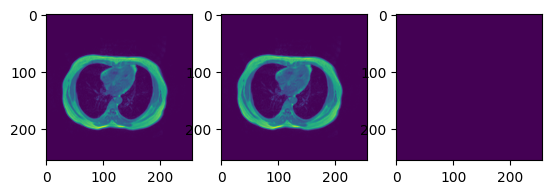

In [74]:
for i in range(26):
    figs, axis = plt.subplots(1, 3)
    images -= images.mean()
    images /= images.std()
    axis[0].imshow(img[0, :, :, i])
    axis[1].imshow(images[0, :, :, i])
    axis[2].imshow(label[:, :, i])
    plt.show()